# Constraint Analysis

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C_D_0 = 0.04


## Constraint 1: Constant altitude and speed cruise

In [39]:
beta = 0.93
alpha = 0.6
q = 10322.25
k_1 = 0.085
W_TO = 6000 * 9.81

W_TO_initial = W_TO / 60
W_TO_end = W_TO / 8

df = pd.DataFrame()
df['W/S'] = np.linspace(W_TO_initial,W_TO_end)
df['T/W_1'] = beta/alpha * ((C_D_0)/(beta/q*df['W/S']) + k_1*beta/q*df['W/S'])

## Constraint 2: Constant speed climb

In [40]:
alpha = 0.7
beta = 0.98
q = 19616
V=322
df['T/W_2'] = beta/alpha * ((C_D_0)/(beta/q*df['W/S']) + k_1*beta/q*df['W/S'] + 1/V)

## Constraint 3: Landing

In [41]:
s_L = 200
beta = 0.2
k_L = 1.2
mu = 0.2
g = 9.81
rho = 1.225
C_L_max_land = 1.8
W_TO_S = s_L / (beta*k_L**2) * (mu*g*rho*C_L_max_land)

## Constraint 3: Takeoff

In [42]:
beta = 1
alpha = 1
k_LO = 1.2
s_G = 300
g = 9.81
rho = 1.225
C_L_max_TO = 1.8
df['T/W_3'] = beta**2/alpha * k_LO**2 / (s_G*g*rho*C_L_max_TO) * df['W/S']

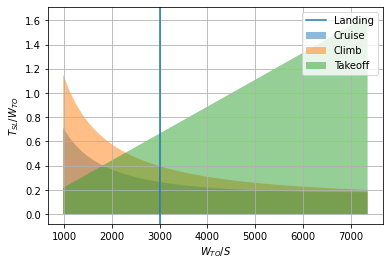

In [43]:
plt.axvline(W_TO_S, label = "Landing")
plt.fill_between(df['W/S'], df['T/W_1'], label="Cruise", alpha=0.5)
plt.fill_between(df['W/S'], df['T/W_2'], label="Climb", alpha=0.5)
plt.fill_between(df['W/S'], df['T/W_3'], label="Takeoff", alpha=0.5)
plt.xlabel('$W_{TO}/S$')
plt.ylabel('$T_{SL}/W_{TO}$')
plt.grid()
plt.legend()
plt.show()